<a href="https://colab.research.google.com/github/Dehan001/data_science/blob/main/Working_with_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the necessary library

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# drive already mounted, to forcebly remount the drive, use drive.mount('/content/drive', force_remount=True)

In [5]:
!ls

drive  sample_data


In [8]:
%cd drive/MyDrive/mastercourse

/content/drive/MyDrive/mastercourse


# Data extraction and feature engineering

In [9]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
df.shape


(48842, 15)

In [11]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [12]:
df.describe(include=(np.number))

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<Axes: title={'center': 'age'}>]], dtype=object)

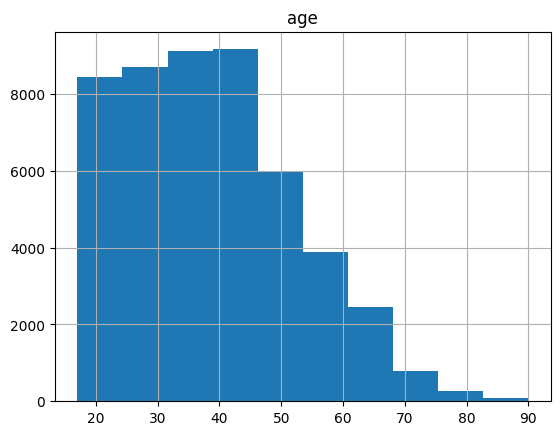

In [13]:
df.hist('age')

array([[<Axes: title={'center': 'fnlwgt'}>]], dtype=object)

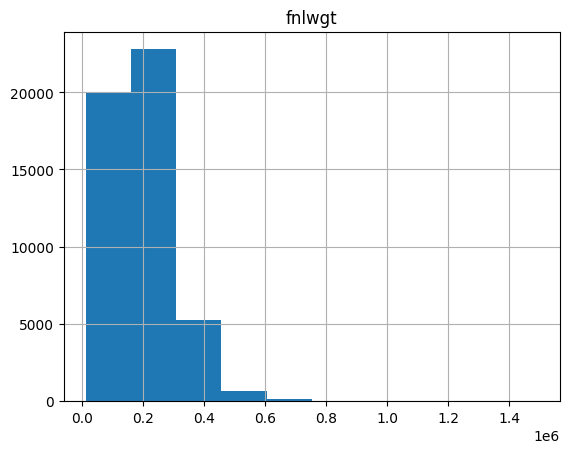

In [14]:
df.hist('fnlwgt')

array([[<Axes: title={'center': 'educational-num'}>]], dtype=object)

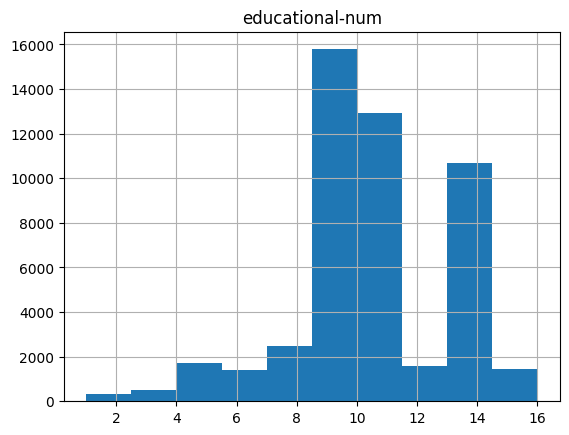

In [15]:
df.hist('educational-num')

array([[<Axes: title={'center': 'capital-gain'}>]], dtype=object)

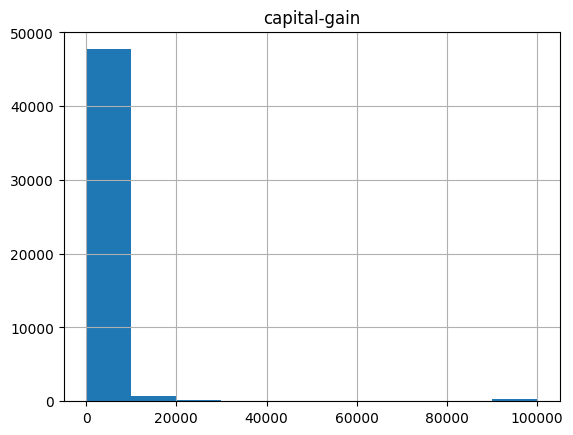

In [16]:
df.hist('capital-gain')

In [17]:
df['log-capital-gain'] = np.log(df['capital-gain']+1)

array([[<Axes: title={'center': 'log-capital-gain'}>]], dtype=object)

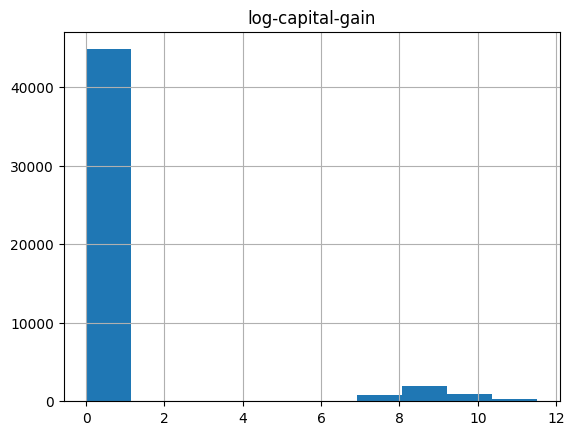

In [18]:
df.hist('log-capital-gain')

<Axes: >

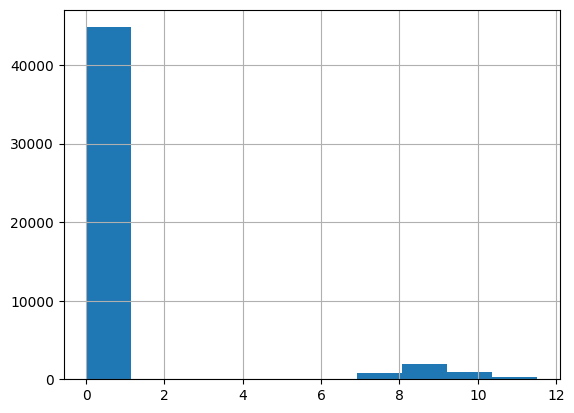

In [19]:
df['log-capital-gain'].hist()

<Axes: >

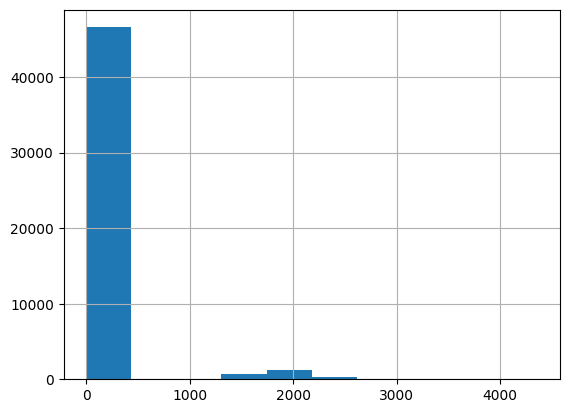

In [20]:
df['capital-loss'].hist()

In [21]:
df['log-capital-loss'] = np.log(df['capital-loss']+1)

<Axes: >

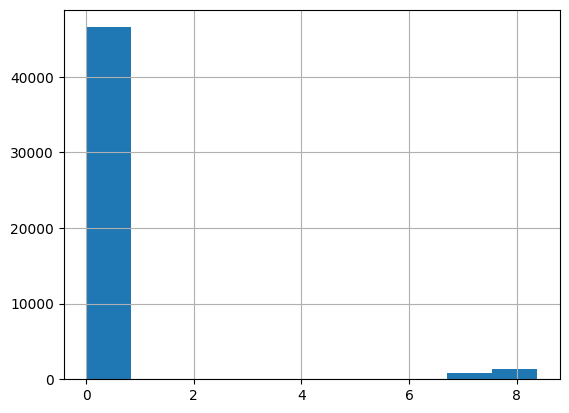

In [22]:
df['log-capital-loss'].hist()

<Axes: >

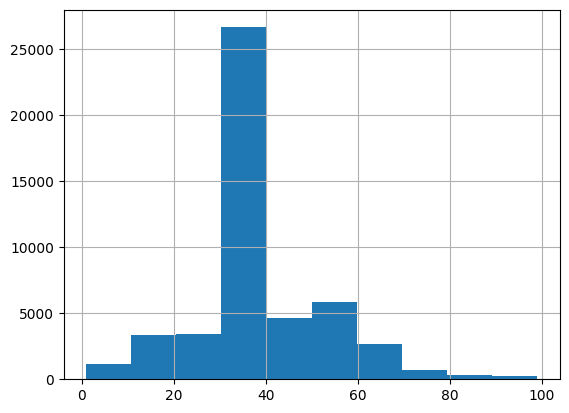

In [23]:
df['hours-per-week'].hist()

# Categorical Attributes


In [24]:
df['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


# Private class is much more than non-private class. So, we considered two classes one is private and other is non-private class.

In [25]:
df['private_workclass'] = (df['workclass']== 'Private')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0,True
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0.000000,0.0,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0.000000,0.0,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,8.947546,0.0,True
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0.000000,0.0,False


In [27]:
df['education'].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


# Let's devide it in 3 classes: post_grad, after high school and school


In [28]:
post_grad_levels = ['Masters', 'Doctorate']
post_grad_status = []

for idx, row in df.iterrows():
  if row['education'] in post_grad_levels:
    post_grad_status.append(1)
  else:
    post_grad_status.append(0)
df['postgrad_education'] = post_grad_status
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0,True,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0.000000,0.0,True,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0.000000,0.0,False,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,8.947546,0.0,True,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0.000000,0.0,False,0


In [29]:
af_HS_levels = ['Bachelors', 'Assoc-acdm', 'Some-college', 'Prof-school', 'Assoc-voc', 'HS-grad']
af_HS_status = []

for idx, row in df.iterrows():
  if row['education'] in af_HS_levels:
    af_HS_status.append(1)
  else:
    af_HS_status.append(0)

df['after_HS_education'] = af_HS_status
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0,True,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0.000000,0.0,True,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0.000000,0.0,False,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,8.947546,0.0,True,0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0.000000,0.0,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.000000,0.0,True,0,1
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0.000000,0.0,True,0,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0.000000,0.0,True,0,1
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0.000000,0.0,True,0,1


In [30]:
school_levels = ["12th", "11th", "10th", "9th", "7th-8th", "5th-6th", "1st-4th", "Preschool"]
school_status = []
for idx, row in df.iterrows():
  if row['education'] in school_levels:
    school_status.append(1)
  else:
    school_status.append(0)

df['school_education'] = school_status
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,40,United-States,<=50K,0.000000,0.0,True,0,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,50,United-States,<=50K,0.000000,0.0,True,0,1,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0,40,United-States,>50K,0.000000,0.0,False,0,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,40,United-States,>50K,8.947546,0.0,True,0,1,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0,30,United-States,<=50K,0.000000,0.0,False,0,1,0


# Let's simplify it to married and unmarried

In [31]:
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [32]:
married_levels = ["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]
married_status = []
for idx, row in df.iterrows():
  if row['marital-status'] in married_levels:
    married_status.append(1)
  else:
    married_status.append(0)

df['married'] = married_status
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,married
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,40,United-States,<=50K,0.000000,0.0,True,0,0,1,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,50,United-States,<=50K,0.000000,0.0,True,0,1,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,40,United-States,>50K,0.000000,0.0,False,0,1,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,40,United-States,>50K,8.947546,0.0,True,0,1,0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,30,United-States,<=50K,0.000000,0.0,False,0,1,0,0


# We will devide job categories into four classes including: white collar, blue collar, service and others.

In [33]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
?,2809
Transport-moving,2355


In [36]:
occupations = {
    "Prof-specialty": "white_collar",
    "Craft-repair": "blue_collar",
    "Exec-managerial": "white_collar",
    "Adm-clerical": "white_collar",
    "Sales": "white_collar",
    "Other-service": "service",
    "Machine-op-inspct": "blue_collar",
    "?": "others",
    "Transport-moving": "blue_collar",
    "Handlers-cleaners": "blue_collar",
    "Farming-fishing": "blue_collar",
    "Tech-support": "white_collar",
    "Protective-serv": "blue_collar",
    "Priv-house-serv": "service",
    "Armed-Forces": "others"
}

occupation_category = [occupations[row['occupation']] for idx, row in df.iterrows()]
df['occupation_cat'] = occupation_category
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,married,occupation_cat
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,United-States,<=50K,0.000000,0.0,True,0,0,1,0,blue_collar
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,United-States,<=50K,0.000000,0.0,True,0,1,0,1,blue_collar
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,United-States,>50K,0.000000,0.0,False,0,1,0,1,blue_collar
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,United-States,>50K,8.947546,0.0,True,0,1,0,1,blue_collar
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,United-States,<=50K,0.000000,0.0,False,0,1,0,0,others


In [37]:
df = pd.get_dummies(df, columns=["occupation_cat"])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,married,occupation_cat_blue_collar,occupation_cat_others,occupation_cat_service,occupation_cat_white_collar
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0.0,True,0,0,1,0,True,False,False,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0.0,True,0,1,0,1,True,False,False,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0.0,False,0,1,0,1,True,False,False,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0.0,True,0,1,0,1,True,False,False,False
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0.0,False,0,1,0,0,False,True,False,False


# cannot more refined

In [38]:
df['relationship'].value_counts()

,count
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


In [42]:
df = pd.get_dummies(df, columns=["relationship"])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,occupation_cat_blue_collar,occupation_cat_others,occupation_cat_service,occupation_cat_white_collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,True,False,False,False,False,False,False,True,False,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,True,False,False,False,True,False,False,False,False,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,True,False,False,False,True,False,False,False,False,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,True,False,False,False,True,False,False,False,False,False
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,False,True,False,False,False,False,False,True,False,False


# Most of them are white and non-white

In [43]:
df['race'].value_counts()

,count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


In [44]:
df['race_white'] = (df['race'] == "White")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,occupation_cat_others,occupation_cat_service,occupation_cat_white_collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,False,False,False,False,False,False,True,False,False,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,False,False,False,True,False,False,False,False,False,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,False,False,False,True,False,False,False,False,False,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,False,False,False,True,False,False,False,False,False,False
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,True,False,False,False,False,False,True,False,False,True


# Same for gender

In [45]:
df['gender'].value_counts()

,count
gender,
Male,32650
Female,16192


In [46]:
df['gender_male'] = (df['gender'] == "Male")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,occupation_cat_service,occupation_cat_white_collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,False,False,False,False,False,True,False,False,False,True
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,False,False,True,False,False,False,False,False,True,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,False,False,True,False,False,False,False,False,True,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,False,False,True,False,False,False,False,False,False,True
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,False,False,False,False,False,True,False,False,True,False


**Most of them are from US. So will go with US and non-US**

In [47]:
df['native-country'].value_counts()

,count
native-country,
United-States,43832
Mexico,951
?,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [48]:
df['country_US'] = (df['native-country'] == "United-States")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,occupation_cat_white_collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male,country_US
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,False,False,False,False,True,False,False,False,True,True
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,False,True,False,False,False,False,False,True,True,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,False,True,False,False,False,False,False,True,True,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,False,True,False,False,False,False,False,False,True,True
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,False,False,False,False,True,False,False,True,False,True


**This is the target. Let's categorize into high or low income**

In [49]:
df['income'].value_counts()

,count
income,
<=50K,37155
>50K,11687


In [50]:
df['high_income'] = (df['income'] == ">50K")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male,country_US,high_income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,False,False,False,True,False,False,False,True,True,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,True,False,False,False,False,False,True,True,True,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,True,False,False,False,False,False,True,True,True,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,True,False,False,False,False,False,False,True,True,True
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,False,False,False,True,False,False,True,False,True,False


In [51]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'log-capital-gain', 'log-capital-loss', 'private_workclass',
       'postgrad_education', 'after_HS_education', 'school_education',
       'married', 'occupation_cat_blue_collar', 'occupation_cat_others',
       'occupation_cat_service', 'occupation_cat_white_collar',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'race_white',
       'gender_male', 'country_US', 'high_income'],
      dtype='object')

# Split data and store everything


In [52]:
df = df[['age', 'fnlwgt', 'educational-num', 'hours-per-week',
       'log-capital-gain', 'log-capital-loss', 'private_workclass',
       'postgrad_education', 'after_HS_education', 'school_education',
       'married', 'occupation_cat_blue_collar', 'occupation_cat_others',
       'occupation_cat_service', 'occupation_cat_white_collar',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'race_white',
       'gender_male', 'country_US', 'high_income']]

df.head()

,age,fnlwgt,educational-num,hours-per-week,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male,country_US,high_income
0,25,226802,7,40,0.000000,0.0,True,0,0,1,...,False,False,False,True,False,False,False,True,True,False
1,38,89814,9,50,0.000000,0.0,True,0,1,0,...,True,False,False,False,False,False,True,True,True,False
2,28,336951,12,40,0.000000,0.0,False,0,1,0,...,True,False,False,False,False,False,True,True,True,True
3,44,160323,10,40,8.947546,0.0,True,0,1,0,...,True,False,False,False,False,False,False,True,True,True
4,18,103497,10,30,0.000000,0.0,False,0,1,0,...,False,False,False,True,False,False,True,False,True,False


In [55]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state =42, stratify=df.high_income)
len(df), len(train_df), len(test_df)

(48842, 39073, 9769)

In [56]:
train_df.to_csv("adult_train.csv", index=False)
test_df.to_csv("adult_test.csv", index=False)